# Modelling Analysis on IDS KDDCUP99 


**Objective**

* Apply Classification/Clustering based Machine Learning Model techniques to predict IDS attacks.

**Approach**

* NaiveBayes, SVM supervised algorithms & KMeans unsupervised clstering are the classification algorithms used in the project. 

* Various models are checked for model metrics.

* PCA is used for dimension reduction. (TBD)

**Results**

* For Binary Classification NaiveBayes gave better accuracy.

  
   * NaiveBayes accuracy : 75.362640%
   * Linear SVM accuracy : 74.036286%
   * KMeans accuracy     : 74.036286%
   

* For Clustering using KMeans to identify four catergories of attack


**KMean label anomaly vs normal attacks in each attack type category :**

**anomaly:**    

        Dos      5995
        Probe    2418
        R2L      1250
        U2R       146
        
**normal:**  
        
        Dos      1463
        Probe       3
        R2L      1504
        U2R        54

**DoS**
* Total rows: 7458
* Percent correctly classified: 80.4%


**Probe**
* Total rows: 2421
* Percent correctly classified: 99.9%


**R2L**
* Total rows: 2754
* Percent correctly classified: 45.4%


**U2R**
* Total rows: 200
* Percent correctly classified: 73.0%

# Pre-processing

In [1]:
%matplotlib notebook

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# ignore all user warnings
simplefilter(action='ignore', category=UserWarning)


COL_NAMES = ["duration", "protocol_type", "service", "flag", "src_bytes",
             "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
             "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
             "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
             "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
             "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
             "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]

In [2]:
data = pd.read_csv('data/KDDTrain+.csv', names=COL_NAMES, index_col=False)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
data.shape

(125973, 42)

In [4]:
data_t = pd.read_csv('data/KDDTest+.csv', names=COL_NAMES, index_col=False)
data_t.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [5]:
data_t.shape

(22543, 42)

In [6]:

"""Default Classifier for Benchmark"""
import pandas as pd

COL_NAMES = ["duration", "protocol_type", "service", "flag", "src_bytes",
             "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
             "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
             "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
             "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
             "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
             "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
             "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]

ATTACKS = {
    'normal': 'normal',

    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',

    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',

    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

class Default(object):

    def __init__(self):
        self.clf = None
        self.training = []
        self.testing = []

    def load_training_data(self, filepath):
        self.training = self.load_data(filepath)

    def load_test_data(self, filepath):
        self.testing = self.load_data(filepath)

    @staticmethod
    def load_data(filepath):
        data = pd.read_csv(filepath, names=COL_NAMES, index_col=False)
        labels = data['labels']
        del data['labels']
        return [data, labels]

    def train_clf(self):
        pass

    def test_clf(self, train=False):
        pass

    def evaluate_results(self, ans=None, train=False):
        if not ans:
            ans = self.test_clf(train)
        print("Accuracy on data: {0:1%}".format(ans[1]))
        return ans
    
    def shuffle_training_data(self):
        data = pd.concat(self.training, axis=1)
        data = data.sample(frac=1).reset_index(drop=True)
        labels = data['labels']
        del data['labels']
        self.training = [data, labels]

# Naive Bayes Classifier

In [7]:
"""Naive Bayes Classifier"""
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#from default_clf import Default, COL_NAMES, ATTACKS

class NaiveBayes(Default):

    @staticmethod
    def load_data(filepath):
        # Preselected features using Feature Vitality Based Reduction Method
        fvbrm_ind = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                     15, 16, 17, 18, 22, 23, 31, 32, 35, 37, 39]
        data = pd.read_csv(filepath, names=COL_NAMES, index_col=False)
        # Shuffle data
        data = data.sample(frac=1).reset_index(drop=True)
        labels = data['labels']
        data = data.iloc[:, fvbrm_ind]
        nom_ind = [1, 2]
        # Convert nominal to category codes
        for num in nom_ind:
            data.iloc[:, num] = data.iloc[:, num].astype('category')
            data.iloc[:, num] = data.iloc[:, num].cat.codes
        # Scale all data to [0-1]
        scaler = MinMaxScaler()
        data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
        return [data, labels]

    def train_clf(self):
        train_data, train_labels = self.training
        bin_labels = train_labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        self.clf = MultinomialNB()
        #self.clf =  GaussianNB()
        self.clf.fit(train_data, bin_labels)
    
    def test_clf(self, train=False):
        if train:
            data, labels = self.training
        else:
            data, labels = self.testing
        bin_labels = labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        test_preds = self.clf.predict(data)
        test_acc = sum(test_preds == bin_labels)/len(test_preds)
        return [test_preds, test_acc]

In [8]:
nbayes = NaiveBayes()
ndata, nlabels = nbayes.load_data('data/KDDTrain+.csv')

In [9]:
nbayes.load_training_data('data/KDDTrain+.csv')
#nbayes.training

In [10]:
nbayes.load_test_data('data/KDDTest+.csv')
#nbayes.testing

In [11]:
train = nbayes.train_clf()
test_preds, test_acc = nbayes.test_clf(train=False)
print(test_preds)
#print(test_acc)

['normal' 'normal' 'normal' ... 'normal' 'anomaly' 'normal']


In [12]:
n = nbayes.evaluate_results()

Accuracy on data: 75.362640%


# Linear SVM Classifier

In [13]:
"""Linear SVM Classifier"""
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC

#from default_clf import Default, COL_NAMES, ATTACKS

class SVM_L(Default):

    @staticmethod
    def load_data(filepath):
        # Preselected features using InfoGain Ranker
        infogain_ind = [3, 4, 5, 6, 12, 23, 24, 25, 26, 29, 30, 31, 32,
                        33, 34, 35, 36, 37, 38, 39]
        data = pd.read_csv(filepath, names=COL_NAMES, index_col=False)
        # Shuffle data
        data = data.sample(frac=1).reset_index(drop=True)
        labels = data['labels']
        data = data.iloc[:, infogain_ind]
        nom_ind = [0]
        # Convert nominal to category codes
        for num in nom_ind:
            data.iloc[:, num] = data.iloc[:, num].astype('category')
            data.iloc[:, num] = data.iloc[:, num].cat.codes
        # Scale all data to [0-1]
        scaler = MinMaxScaler()
        data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
        return [data, labels]

    def train_clf(self):
        train_data, train_labels = self.training
        bin_labels = train_labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        self.clf = LinearSVC(C=8)
        self.clf.fit(train_data, bin_labels)

    def test_clf(self, train=False):
        if train:
            data, labels = self.training
        else:
            data, labels = self.testing
        bin_labels = labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        test_preds = self.clf.predict(data)
        test_acc = sum(test_preds == bin_labels)/len(test_preds)
        return [test_preds, test_acc]

In [14]:
lsvm = SVM_L()
sdata, slabels = lsvm.load_data('data/KDDTrain+.csv')

In [15]:
lsvm.load_training_data('data/KDDTrain+.csv')
#lsvm.training

In [16]:
lsvm.load_test_data('data/KDDTest+.csv')
#lsvm.testing

In [17]:
train = lsvm.train_clf()
test_preds, test_acc = lsvm.test_clf(train=False)
print(test_preds)
#print(test_acc)

['anomaly' 'normal' 'anomaly' ... 'anomaly' 'anomaly' 'normal']


In [18]:
n = lsvm.evaluate_results()

Accuracy on data: 76.906357%


# K-Means Classifier

In [19]:
"""K-Means Classifier"""
import collections
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

#from default_clf import Default, COL_NAMES, ATTACKS

class KMeans_M(Default):

    def __init__(self):
        super().__init__()
        self.cols = None
        self.clusters = {0:None, 1:None, 2:None, 3:None}

    def load_training_data(self, filepath):
        data, labels = self.load_data(filepath)
        self.cols = data.columns
        self.training = [data, labels]

    def load_test_data(self, filepath):
        data, labels = self.load_data(filepath)
        map_data = pd.DataFrame(columns=self.cols)
        map_data = map_data.append(data)
        data = map_data.fillna(0)
        self.testing = [data[self.cols], labels]

    @staticmethod
    def load_data(filepath):
        data = pd.read_csv(filepath, names=COL_NAMES, index_col=False)
        # Shuffle data
        data = data.sample(frac=1).reset_index(drop=True)
        NOM_IND = [1, 2, 3]
        BIN_IND = [6, 11, 13, 14, 20, 21]
        # Need to find the numerical columns for normalization
        NUM_IND = list(set(range(40)).difference(NOM_IND).difference(BIN_IND))

        # Scale all numerical data to [0-1]
        data.iloc[:, NUM_IND] = minmax_scale(data.iloc[:, NUM_IND])
        labels = data['labels']
        del data['labels']
        data = pd.get_dummies(data)
        return [data, labels]

    def train_clf(self):
        self.clf = KMeans(n_clusters=4, init='random').fit(self.training[0])
        self.set_categories()

    def test_clf(self, train=False):
        if train:
            data, labels = self.training
        else:
            data, labels = self.testing
        test_preds = self.clf.predict(data)
        test_preds = [self.clusters[x] for x in test_preds]
        bin_labels = labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        test_acc = sum(test_preds == bin_labels)/len(test_preds)
        return [test_preds, test_acc]

    def set_categories(self):
        labels = self.training[1]
        bin_labels = labels.apply(lambda x: x if x == 'normal' else 'anomaly')
        clust_preds = self.clf.labels_
        count = collections.Counter(zip(clust_preds, bin_labels))
        num = [0, 0, 0, 0]
        for k, val in count.items():
            clust = k[0]
            if val > num[clust]:
                num[clust] = val
                self.clusters[clust] = k[1]

In [20]:
kmeans = KMeans_M()
traindata = kmeans.load_data('data/KDDTrain+.csv')

In [21]:
kmeans.load_training_data('data/KDDTrain+.csv')
#kmeans.training

In [22]:
kmeans.load_test_data('data/KDDTest+.csv')
#kmeans.testing

In [23]:
train = kmeans.train_clf()
test_preds, test_acc = kmeans.test_clf(train=False)
#print(test_preds)
#print(test_acc)

In [24]:
n = kmeans.evaluate_results()

Accuracy on data: 74.036286%


# K-Means Detailed Evaluation for 4 types of attacks


Now defining an evaluation function that uses the model to cluster rows and then associates each cluster with either "normal" or "anomaly" and calculates the accuracy.

In [25]:
def load_data(file_path, cols=None):
    data = pd.read_csv(file_path, names=COL_NAMES, index_col=False)
    # Shuffle data
    data = data.sample(frac=1).reset_index(drop=True)
    NOM_IND = [1, 2, 3]
    BIN_IND = [6, 11, 13, 14, 20, 21]
    # Need to find the numerical columns for normalization
    NUM_IND = list(set(range(40)).difference(NOM_IND).difference(BIN_IND))

    # Scale all numerical data to [0-1]
    data.iloc[:, NUM_IND] = minmax_scale(data.iloc[:, NUM_IND])
    labels = data['labels']
    # Binary labeling
    del data['labels']
    data = pd.get_dummies(data)
    if cols is None:
        cols = data.columns
    else:
        map_data = pd.DataFrame(columns=cols)
        map_data = map_data.append(data)
        data = map_data.fillna(0)
        data = data[cols]
    return [data, labels, cols]

In [26]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# ignore all user warnings
simplefilter(action='ignore', category=UserWarning)

def get_results(data, labels, clf):
    preds = clf.predict(data)
    ans = pd.DataFrame({'label':labels.values, 'kmean':preds})
    return ans

def evaluate_kmeans(data, labels, clf=None):
    if clf is None:
        clf = KMeans(n_clusters=4,init='random').fit(data)
    ans = get_results(data, labels, clf)
    ans = ans.groupby(['kmean', 'label']).size()
    print(ans)

    # Get the larger number from each cluster
    correct = sum([anom if anom > norm else norm for anom, norm in zip(ans[::2],ans[1::2])])
    print("Total accuracy: {0:.1%}".format(correct/sum(ans)))
    return clf

# Loading the training data

The training data is loaded from file, categorical columns are converted into binary columns and numerical columns are scaled to [0-1] values.

In [27]:
train_data, train_labels, cols = load_data('data/KDDTrain+.csv')
train_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,7.246566e-08,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.818888e-07,0.000002,0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,1,0,0,0,0,0,0,0,0,0


# Training

Now training the model and checking the accuracy on the training set:

In [28]:
bin_train_labels = train_labels.apply(lambda x: x if x =='normal' else 'anomaly')
clf = evaluate_kmeans(train_data, bin_train_labels)

kmean  label  
0      anomaly    34847
       normal       163
1      anomaly    12138
       normal      2959
2      anomaly     1960
       normal     48134
3      anomaly     9685
       normal     16087
dtype: int64
Total accuracy: 88.3%


# Test Set

Loading the test data set, passing the columns will map the test set to match the training columns

In [29]:
test_data, test_labels, cols = load_data('data/KDDTest+.csv', cols)
test_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,7.003509e-07,0.000097,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.000000e+00,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,7.162680e-07,0.000082,0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,1,0


Now to cluster the test data:

In [30]:
bin_test_labels = test_labels.apply(lambda x: x if x =='normal' else 'anomaly')
evaluate_kmeans(test_data, bin_test_labels, clf)

kmean  label  
0      anomaly    2259
       normal        6
1      anomaly    4809
       normal       82
2      anomaly    3024
       normal     7357
3      anomaly    2741
       normal     2265
dtype: int64
Total accuracy: 76.1%


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Observations

Graph of Output

<IPython.core.display.Javascript object>


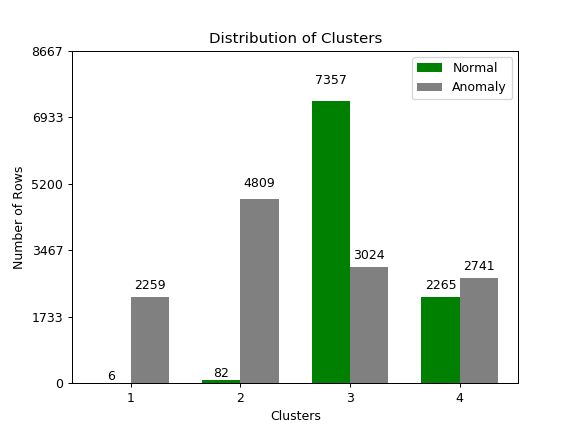

In [31]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(4)
width = .35
ans = get_results(test_data, bin_test_labels, clf)
normal = []
anom = []
bin_ans = ans.groupby(['kmean', 'label']).size()
roof = round(bin_ans.max(), -2) + 3000
for i in range(0,4):
    normal.append(bin_ans[i]['normal'])
    anom.append(bin_ans[i]['anomaly'])
fig, ax = plt.subplots()
rects1 = ax.bar(ind, normal, width, color='green')
rects2 = ax.bar(ind + width, anom, width, color='grey')
ax.set_ylabel('Number of Rows')
ax.set_title('Distribution of Clusters')
ax.set_yticks(np.arange(roof, step=roof/6))
ax.set_xlabel('Clusters')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4'))
ax.legend((rects1[0], rects2[0]), ('Normal', 'Anomaly'))

def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1, ax)
autolabel(rects2, ax)

# Evaluation of Accuracy on Each Attack

In [32]:
clusters = ['normal' if norm > anom else 'anom' for anom, norm in zip(bin_ans[::2], bin_ans[1::2])]
categ_ans = ans
test_categ_labels = test_labels.apply(lambda x: ATTACKS[x])
categ_ans['label'] = test_categ_labels
categ_ans['kmean'] = categ_ans['kmean'].apply(lambda x: clusters[x])
categ_ans = categ_ans[categ_ans['label'] != 'normal']

print(categ_ans.groupby(['kmean', 'label']).size())
for label in categ_ans.label.unique():
    print('\n' + label)
    total = sum(categ_ans['label']==label)
    print('Total rows: {}'.format(total))
    correct = sum(categ_ans[categ_ans['label']==label]['kmean'] == 'anom')
    print('Percent correctly classified: {:.1%}\n'.format(correct/total))

kmean   label
anom    DoS      5995
        Probe    2418
        R2L      1250
        U2R       146
normal  DoS      1463
        Probe       3
        R2L      1504
        U2R        54
dtype: int64

DoS
Total rows: 7458
Percent correctly classified: 80.4%


Probe
Total rows: 2421
Percent correctly classified: 99.9%


R2L
Total rows: 2754
Percent correctly classified: 45.4%


U2R
Total rows: 200
Percent correctly classified: 73.0%




Probe and DoS have the highest accuracy, and DoS also has the most representation in the test data.

U2R accuracy is reasonably high, however there were only 200 rows in the test data. R2L had least performance with less than 50% accuracy. 
